In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Tree Visualisation
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import graphviz


# Display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [42]:
df = pd.read_pickle('./data/processed/alzheimers_prediction_dataset.pkl')
X, y = df.drop(columns=['Alzheimer’s Diagnosis']), df["Alzheimer’s Diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8) # random_state for reproducibility 

display(X.head())
display(y.value_counts())


,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Cognitive Test Score,Depression Level,Sleep Quality,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,is_former_smoker,is_retired,is_widowed
0,90,1,1,33.0,2,0,2,0,0,0,0,90,1,1,3,3,0,0,0,1,2,3,1,0,1,0
1,72,1,7,29.9,2,0,1,0,0,0,0,65,1,3,3,2,0,0,0,3,1,3,1,1,0,1
2,86,0,19,22.9,3,1,2,0,1,0,0,43,3,3,2,2,1,0,0,1,2,3,0,0,0,0
3,53,1,17,31.2,1,0,3,1,0,0,0,81,2,2,3,2,0,0,0,3,2,1,0,0,1,0
4,58,0,3,30.0,3,0,1,1,0,0,0,49,3,1,1,3,1,1,0,1,2,3,0,1,0,0


Alzheimer’s Diagnosis
0    43570
1    30713
Name: count, dtype: int64

# Logistic Regression

In [44]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=8, solver='lbfgs', max_iter=500) #, max_iter=500

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

[0 1]
Accuracy: 0.7051894729757017


Text(0.5, 427.9555555555555, 'Predicted label')

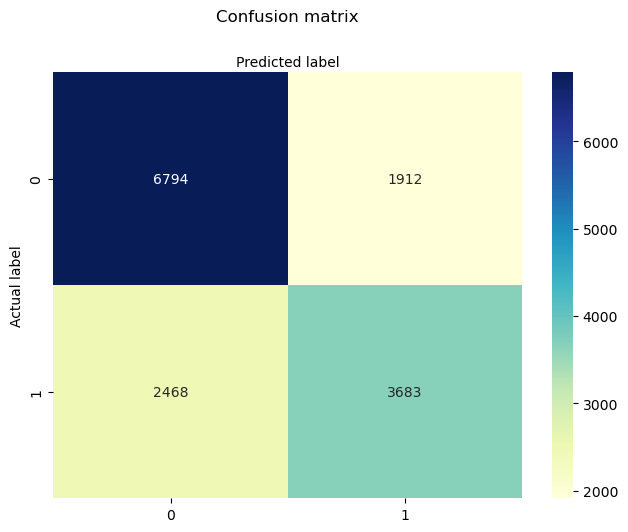

In [45]:
print(y_test.unique())
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [46]:
target_names = ['without Alzheimers', 'with Alzheimers']
print(classification_report(y_test, y_pred, target_names=target_names))

                    precision    recall  f1-score   support

without Alzheimers       0.73      0.78      0.76      8706
   with Alzheimers       0.66      0.60      0.63      6151

          accuracy                           0.71     14857
         macro avg       0.70      0.69      0.69     14857
      weighted avg       0.70      0.71      0.70     14857



[[ 8.14333712e-02  2.70673287e-03 -9.67910456e-04 -3.93716837e-05
   6.50569266e-03 -1.43138539e-02  3.95311279e-03 -1.24504756e-03
  -8.70590007e-03 -2.41345006e-02  8.06690974e-01 -1.16453102e-04
  -1.11333397e-03 -7.73697467e-03 -5.17883657e-03 -1.10129677e-02
  -4.40590775e-03  1.56477112e-02  1.25565910e+00  1.44434541e-03
   1.55229777e-02 -1.35193212e-04 -2.36780343e-02 -1.95609253e-02
   1.98727436e-02  1.94225178e-02]]


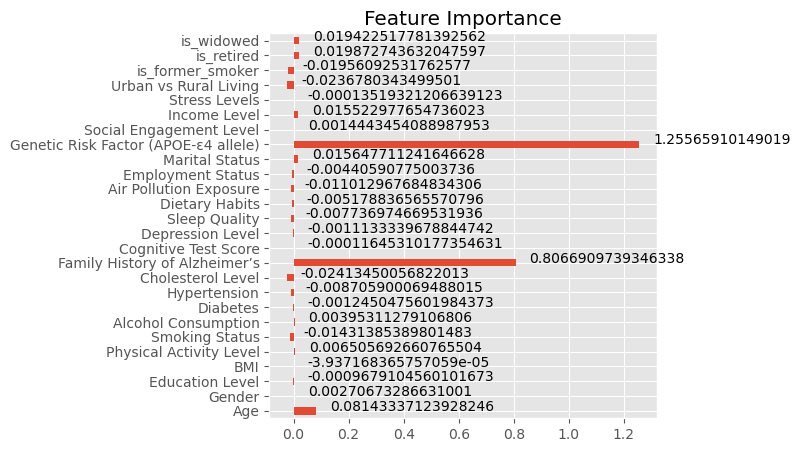

In [79]:
print(logreg.coef_)
logreg.feature_names_in_

# get importance
importance = logreg.coef_[0]

matplotlib.rc('figure', figsize=[5,5])
plt.style.use('ggplot')
feat_importances = pd.Series(importance)
ax = feat_importances.plot(kind='barh',title = 'Feature Importance')
# Annotate data values
for i, value in enumerate(importance):
    ax.annotate(value, (value, i), textcoords="offset points", xytext=(10,0), ha='left')
ax.set_yticklabels(logreg.feature_names_in_)
plt.show()

# Decision Tree

In [47]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6262367907383725


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0437719 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0437719 to fit



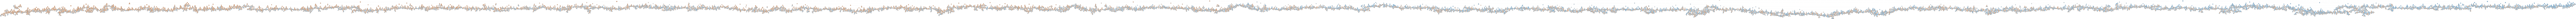

In [53]:
feature_cols = X.columns.to_list()
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('alzheimers.png')
Image(graph.create_png())

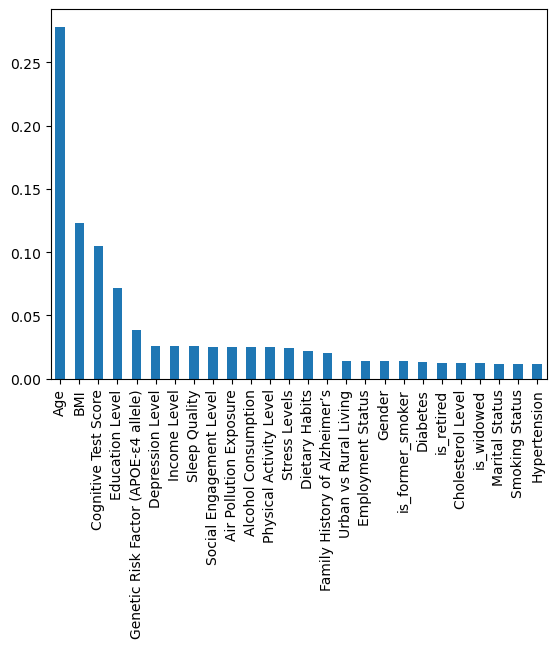

In [57]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

# Random Forest

In [54]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.712660698660564


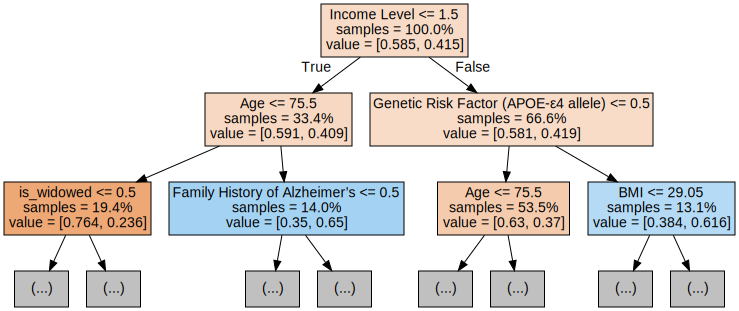

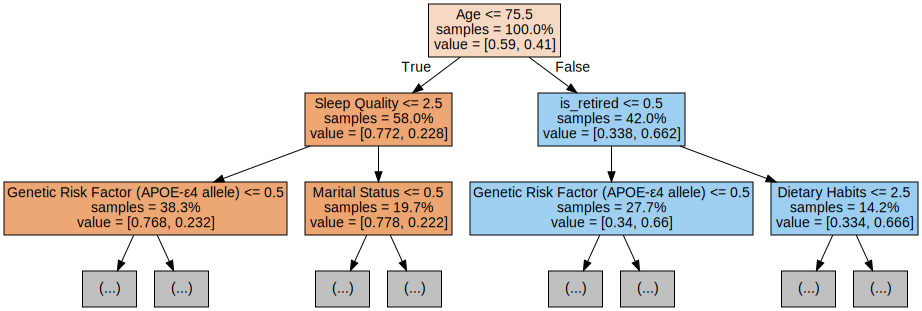

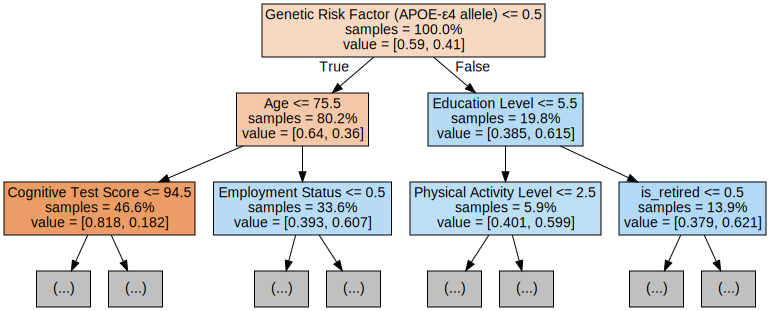

In [55]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

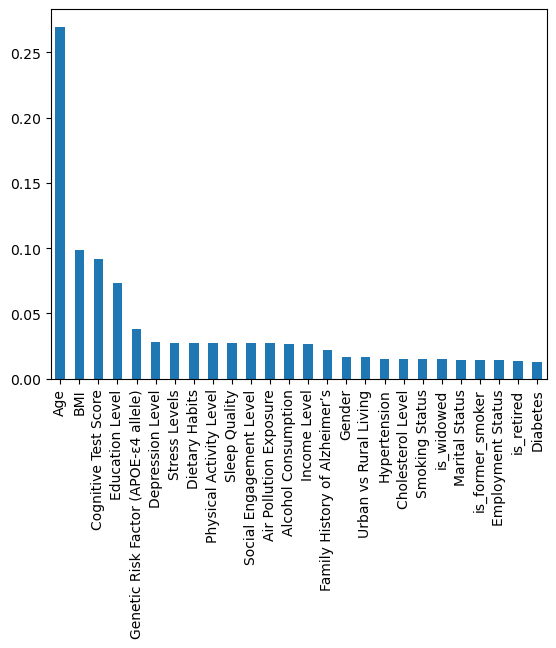

In [56]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

# XGBoost

# Neural Network (Simple)